1) Загрузите данные по вариантам в ноутбук.

In [1]:
import numpy as np
import pandas as pd
A = pd.read_excel('Вариант 2.xlsx')
A.rename(columns=dict(zip(list(A.columns.values), A.iloc[1])) , inplace=True)
AVG = A.iloc[-1]['Балл']
A = A.drop([0, 1])
A = A[:-1]
A = A.set_index('№')
display(A)

,№ школы,Класс,Пол,Номер варианта,Задания с кратким ответом,Задания с развёрнутым ответом,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,
1,124,11,Ж,341,------+-----,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
2,128,11,Ж,345,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
3,132,11,Ж,340,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
4,134,11,Ж,339,-+----------,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
5,136,11,Ж,348,--------+---,0(2)0(2)0(2)0(3)0(3)0(4)0(4),NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...
2352,136,11,М,337,++++++++++++,2(2)2(2)2(2)3(3)3(3)0(4)1(4),NaN,25,92,27
2353,136,11,М,341,++-+++++++++,2(2)2(2)1(2)2(3)2(3)4(4)1(4),NaN,25,92,27
2354,136,11,М,341,++++++++++++,2(2)1(2)2(2)1(3)3(3)4(4)2(4),NaN,27,96,27


2) Сделайте описательную статистику полученных данных.

In [2]:
A.groupby(['№ школы']).mean()['Балл']

/var/folders/nw/sh4y7mcj75lb5x8w2rztcj4m0000gn/T/ipykernel_22773/3996890549.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  A.groupby(['№ школы']).mean()['Балл']


№ школы
121    47.716049
122    43.314815
123    48.774775
124    36.542857
125    49.688312
126    47.845070
127    51.130682
128    44.115044
129    42.818182
130    44.076923
131    48.000000
132    41.144231
133    49.347826
134    41.750000
135    47.681319
136    51.657843
137    54.818182
Name: Балл, dtype: float64

3) Найдите процент учащихся, выполнивших работу ниже среднего.

In [3]:
(A[A['Балл'] < AVG].shape[0]) / A.shape[0] * 100

48.00509337860781

4) Найти процент учащихся не сдавших экзамен.

In [4]:
(A[A['Балл'] < A['Минимальный балл']].shape[0]) / A.shape[0] * 100

9.210526315789473

5) Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен.

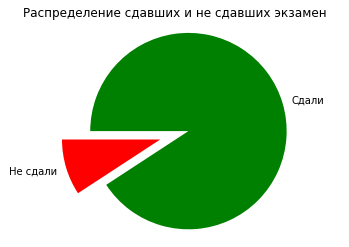

In [5]:
import matplotlib.pyplot as plt
labels = ['Не сдали','Сдали']
values = [A[A['Балл'] < A['Минимальный балл']].shape[0], A[A['Балл'] >= A['Минимальный балл']].shape[0]]
colors = ['red', 'green']
explode = [0.3, 0]
plt.title('Распределение сдавших и не сдавших экзамен')
plt.pie(values, labels=labels, colors=colors, explode=explode, startangle=180)
plt.axis('equal')
plt.show()

6) Постройте ядерную оценку плотности распределению баллов за экзамен.

/Users/andrey_suncov/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Балл', ylabel='Density'>

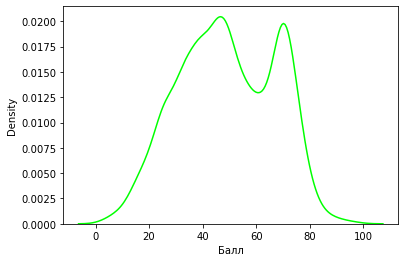

In [6]:
import seaborn as sns
sns.distplot(A['Балл'], kde=True, hist = False, color = 'lime')

7) Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».

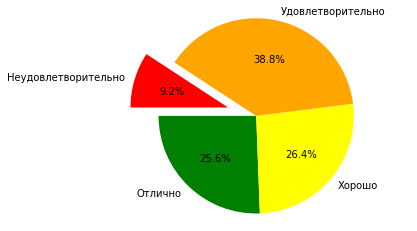

In [7]:
labels = ['Отлично', 'Хорошо', 'Удовлетворительно', 'Неудовлетворительно']
values = [A.loc[(A['Балл'] >= 68)].shape[0], A.loc[(A['Балл'] >= 50) & (A['Балл'] < 68)].shape[0], A.loc[(A['Балл'] >= A['Минимальный балл']) & (A['Балл'] < 49)].shape[0], A.loc[(A['Балл'] < A['Минимальный балл'])].shape[0]]
colors = ['green', 'yellow', 'orange', 'red']
explode = [0, 0, 0, 0.3]
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, startangle=180)
plt.axis('equal')
plt.show()

8) Какое процентное соотношение юношей и девушек писало данный экзамен?

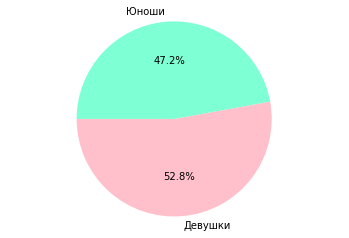

In [8]:
labels = ['Девушки', 'Юноши']
values = [A.loc[(A['Пол'] == 'Ж')].shape[0], A.loc[(A['Пол'] == 'М')].shape[0]]
colors = ['pink', 'aquamarine']
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=colors, startangle=180)
plt.axis('equal')
plt.show()

9) Сколько школ принимало участие в экзамене?

In [9]:
len(A['№ школы'].unique())

17

10) Сколько всего заданий с кратким ответом? С развернутым ответом?

In [10]:
a1 = len(A.iloc[0]['Задания с кратким ответом'])
a2 = int(len(A.iloc[0]['Задания с развёрнутым ответом'])/4)
print(f'Задания с кратким ответом: {a1}, Задания с развёрнутым ответом: {a2}')

Задания с кратким ответом: 12, Задания с развёрнутым ответом: 7


11) Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В1, ..., Вк
* Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

[89.26, 95.33, 92.78, 91.0, 88.5, 73.17, 37.48, 47.84, 91.85, 71.48, 59.25, 46.22]
[10.74, 4.67, 7.22, 9.0, 11.5, 26.83, 62.52, 52.16, 8.15, 28.52, 40.75, 53.78]


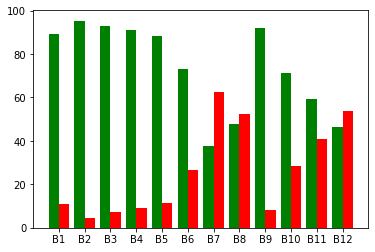

In [11]:
all_B = list(A['Задания с кратким ответом'])
B_done = [0 for i in range(len(all_B[0]))]

for el in all_B:
    for i in range(len(el)):
        if el[i] == '+':
            B_done[i] += 1
for i in range(len(B_done)):
    B_done[i] = round(B_done[i] / len(all_B) * 100, 2)

B_didt = [round(100 - i, 2) for i in B_done]

groups = [f"B{i}" for i in range(1, len(B_done)+1)]

print(B_done)
print(B_didt)

X_axis = np.arange(len(groups))
plt.bar(X_axis - 0.2, B_done, 0.4, color='green')
plt.bar(X_axis + 0.2, B_didt, 0.4, color='red')
plt.xticks(X_axis, groups)
plt.show()


12) Аналогично и с типом С (ответы с развернутым ответом)

[33.91, 15.87, 15.58, 2.72, 3.4, 1.1, 3.4]
[66.09, 84.13, 84.42, 97.28, 96.6, 98.9, 96.6]


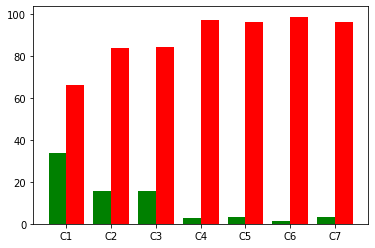

In [12]:
all_C = list(A['Задания с развёрнутым ответом'])
C_done = [0 for i in range(int(len(all_C[0])/4))]
for el in all_C:
    for i in range(len(el)):
        if i%4==0 and el[i] != '0' :
            C_done[i//4] += 1
for i in range(len(C_done)):
    C_done[i] = round(C_done[i] / len(all_C) * 100, 2)

C_didt = [round(100 - i, 2) for i in C_done]

groups = [f"C{i}" for i in range(1, len(C_done)+1)]

print(C_done)
print(C_didt)

X_axis = np.arange(len(groups))
plt.bar(X_axis - 0.2, C_done, 0.4, color='green')
plt.bar(X_axis + 0.2, C_didt, 0.4, color='red')
plt.xticks(X_axis, groups)
plt.show()

13) Сделайте анализ по двум школам:
* по всем выполненным заданиям типа В
* по заданиям типа С больше 50%
* по среднему баллу юношей и девушек

In [13]:
A_st = A.loc[(A['№ школы'] == 124) | (A['№ школы'] == 123)]
B_school = []
for el in list(A_st['Задания с кратким ответом']):
    B_school.append(round(el.count('+') / len(el) * 100, 2))
print('Процент выполнения задания В каждый учеником школы №124 и школы №123:')
print(B_school)

Процент выполнения задания В каждый учеником школы №124 и школы №123:
[8.33, 16.67, 25.0, 25.0, 25.0, 33.33, 33.33, 33.33, 41.67, 41.67, 41.67, 41.67, 41.67, 41.67, 41.67, 41.67, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 58.33, 58.33, 50.0, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 58.33, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 66.67, 75.0, 75.0, 66.67, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 66.67, 75.0, 75.0, 75.0, 83.33, 83.33, 75.0, 83.33, 83.33, 83.33, 83.33, 83.33, 91.67, 75.0, 91.67, 91.67, 91.67, 75.0, 75.0, 91.67, 100.0, 83.33, 83.33, 100.0, 83.33, 83.33, 100.0, 83.33, 83.33, 91.67, 83.33, 83.33, 91.67, 91.67, 91.67, 91.67, 91.67, 100.0, 100.0, 83.33, 100.0, 91.67, 91.67, 91.67, 100.0, 91.67, 100.0, 91.67, 91.67, 100.0, 91.67, 91.67, 83.33,

In [14]:
A_st = A.loc[(A['№ школы'] == 124) | (A['№ школы'] == 123)]
С_school = []
for el in list(A_st['Задания с развёрнутым ответом']):
    temp = 0
    for i in range(len(el)):
        if i%4 == 0: 
            if int(el[i]) >= int(int(el[i+2])/2):
                temp += 1
    С_school.append(round(temp/(len(el)/4)*100))
print('Процент выполнения заданий С больще 50% каждый учеником школы №124 и школы №123:')            
print(С_school)

Процент выполнения заданий С больще 50% каждый учеником школы №124 и школы №123:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 14, 14, 0, 0, 14, 14, 0, 14, 14, 0, 14, 14, 14, 43, 29, 14, 14, 14, 14, 14, 14, 14, 29, 14, 29, 29, 29, 14, 29, 29, 29, 29, 14, 29, 29, 43, 29, 29, 43, 43, 43, 57, 43, 57]


In [15]:
A_st = A.loc[(A['№ школы'] == 124) | (A['№ школы'] == 123)]
print('Средний балл девушек школы №124 и школы №123:')
print(round(A_st[A_st['Пол']=='Ж'].mean()['Балл'], 2))
print('Средний балл юношей школы №124 и школы №123:')
print(round(A_st[A_st['Пол']=='М'].mean()['Балл'], 2))

Средний балл девушек школы №124 и школы №123:
45.51
Средний балл юношей школы №124 и школы №123:
46.27


/var/folders/nw/sh4y7mcj75lb5x8w2rztcj4m0000gn/T/ipykernel_22773/3952791368.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(round(A_st[A_st['Пол']=='Ж'].mean()['Балл'], 2))
/var/folders/nw/sh4y7mcj75lb5x8w2rztcj4m0000gn/T/ipykernel_22773/3952791368.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(round(A_st[A_st['Пол']=='М'].mean()['Балл'], 2))


14) Для каждого задания добавьте соответствующий раздел в ноутбук и текстовые пояснения.

In [16]:
Bs = []
for el in list(A['Задания с кратким ответом']):
    temp = []
    for i in el:
        temp.append(i)
    Bs.append(temp)
for i in range(len(Bs)):
    Bs[i].append(list(A.index)[i])
B_plus = pd.DataFrame(Bs, columns = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', '№'])
B_plus = B_plus.set_index('№')
result = pd.concat([A, B_plus], axis=1, join='inner')
pd.set_option('display.max_columns', 200)
result.head(10)
cols = result.columns.tolist()
result = result[cols[:4] + cols[10:] + cols[6:10]]
result

,№ школы,Класс,Пол,Номер варианта,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,,,,,,,,,,,
1,124,11,Ж,341,-,-,-,-,-,-,+,-,-,-,-,-,NaN,1,5,27
2,128,11,Ж,345,-,+,-,-,-,-,-,-,-,-,-,-,NaN,1,5,27
3,132,11,Ж,340,-,+,-,-,-,-,-,-,-,-,-,-,NaN,1,5,27
4,134,11,Ж,339,-,+,-,-,-,-,-,-,-,-,-,-,NaN,1,5,27
5,136,11,Ж,348,-,-,-,-,-,-,-,-,+,-,-,-,NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,136,11,М,337,+,+,+,+,+,+,+,+,+,+,+,+,NaN,25,92,27
2353,136,11,М,341,+,+,-,+,+,+,+,+,+,+,+,+,NaN,25,92,27
2354,136,11,М,341,+,+,+,+,+,+,+,+,+,+,+,+,NaN,27,96,27


In [17]:
Cs = []
for el in list(A['Задания с развёрнутым ответом']):
    temp = []
    for i in range(len(el)):
        if i%4==0:
            temp.append(el[i])
            temp.append(el[i+2])
    Cs.append(temp)
for i in range(len(Cs)):
    Cs[i].append(list(A.index)[i])
C_plus = pd.DataFrame(Cs, columns = ['C1', 'C1 max', 'C2', 'C2 max', 'C3', 'C3 max', 'C4', 'C4 max', 'C5', 'C5 max', 'C6', 'C6 max', 'C7', 'C7 max',  '№'])
C_plus = C_plus.set_index('№')
result_end = pd.concat([result, C_plus], axis=1, join='inner')
cols = result_end.columns.tolist()
result_end = result_end[cols[:16] + cols[20:] + cols[16:20]]
result_end

,№ школы,Класс,Пол,Номер варианта,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12,C1,C1 max,C2,C2 max,C3,C3 max,C4,C4 max,C5,C5 max,C6,C6 max,C7,C7 max,Устная часть,Первичный балл,Балл,Минимальный балл
№,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,124,11,Ж,341,-,-,-,-,-,-,+,-,-,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
2,128,11,Ж,345,-,+,-,-,-,-,-,-,-,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
3,132,11,Ж,340,-,+,-,-,-,-,-,-,-,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
4,134,11,Ж,339,-,+,-,-,-,-,-,-,-,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
5,136,11,Ж,348,-,-,-,-,-,-,-,-,+,-,-,-,0,2,0,2,0,2,0,3,0,3,0,4,0,4,NaN,1,5,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2352,136,11,М,337,+,+,+,+,+,+,+,+,+,+,+,+,2,2,2,2,2,2,3,3,3,3,0,4,1,4,NaN,25,92,27
2353,136,11,М,341,+,+,-,+,+,+,+,+,+,+,+,+,2,2,2,2,1,2,2,3,2,3,4,4,1,4,NaN,25,92,27
2354,136,11,М,341,+,+,+,+,+,+,+,+,+,+,+,+,2,2,1,2,2,2,1,3,3,3,4,4,2,4,NaN,27,96,27
